# Analyse wave parameters

In this notebook we use Datamesh to load and analyse timeseries of wave parameters from Oceanum CMIP6 wave model outputs around New Zealand.

## Background

### Wave Model Setup

The Oceanum CMIP6 wave modeling suite consists of two nested components:

* **Global WAVEWATCH III model**: 1-degree resolution (~100 km) providing boundary conditions
* **Regional SWAN model**: 0.05-degree resolution (~5 km) focused on New Zealand waters

This high-resolution regional model captures coastal wave processes and local effects that are critical for understanding wave climate around New Zealand's complex coastline.

### Climate Forcing

Two CMIP6 global climate models drive the wave simulations:

* **ACCESS-CM2** (Australian Community Climate and Earth System Simulator)
* **EC-Earth3** (European Earth System Model)

The global wave model uses direct CMIP6 outputs, while the regional SWAN model is driven by NIWA's 5-km downscaled atmospheric data, ensuring consistent high-resolution forcing for coastal wave modeling.

### Temporal Coverage and Scenarios

The dataset spans **400 years** across three experiment periods:

* **Historical**: 1985-2015 (30 years) - observed climate conditions
* **SSP2-4.5**: 2015-2100 (85 years) - moderate emission scenario
* **SSP3-7.0**: 2015-2100 (85 years) - high emission scenario

All data are output at 3-hourly intervals, providing detailed temporal resolution for wave climate analysis.

### Available Data Products

Three complementary datasets are available:

* **Gridded wave parameters**: 28 wave and forcing parameters integrated over the full spectrum and spectral partitions
* **Wave spectra**: Frequency-direction wave energy spectra at selected locations with enhanced resolution near coasts and shallow areas (4,000+ global locations, 1,321 around New Zealand)
* **Gridded wave statistics**: Pre-computed statistics including means, maxima, and quantiles of key variables

## Notebook Objectives

This analysis focuses on the **gridded wave statistics** dataset to:

1. **Visualize spatial patterns** of wave climate statistics across the globe and New Zealand waters
2. **Compare statistical distributions** between different regions around New Zealand
3. **Assess climate model differences** through spatial comparison of ACCESS-CM2 and EC-Earth3 outputs
4. **Examine future projections** by mapping changes between historical and projected periods
5. **Evaluate emission scenario impacts** through spatial comparison of SSP2-4.5 vs SSP3-7.0 scenarios

The analysis will demonstrate how to efficiently access and visualize pre-computed wave statistics using Datamesh, creating informative maps that reveal spatial patterns in New Zealand's wave climate and how it may change under different climate futures. This approach is particularly valuable for understanding regional variations and identifying areas of greatest change without needing to process the full high-resolution timeseries data.

### Required Python Libraries

- [oceanum](https://oceanum-python.readthedocs.io/en/latest/): Python client for accessing Datamesh
- [xarray](https://xarray.pydata.org/en/stable/): Data analysis library
- [matplotlib](https://matplotlib.org/stable/contents.html): Data visualisation library
- [cartopy](https://scitools.org.uk/cartopy/docs/latest/): Geospatial data visualisation library
- [shapely](https://shapely.readthedocs.io/en/stable/): Geospatial data analysis library

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm
import cartopy.crs as ccrs
from oceanum.datamesh import Connector

import warnings
warnings.filterwarnings("ignore")

## 1. Setting Up the Connection

The [Connector](https://oceanum-python.readthedocs.io/en/latest/classes/datamesh/oceanum.datamesh.Connector.html) class provides access to methods for querying data and metadata from Datamesh.

**Authentication**: You can provide your Datamesh token directly or set it as an environment variable `DATAMESH_TOKEN`.


In [2]:
conn = Connector()

Using datamesh API version 0
You are using version 1.0.8 of oceanum_python. A new version is available: 1.0.9. Please update your client to benefit from the latest features and updates.


## 2. Accessing the data

### 2.1. Searching from Datamesh

The `get_catalog` method allows you to search for datasets using keywords that match against dataset names, descriptions, and tags.

Here we will search the gridded wave stats datasources using specific tags associated with them.

In [3]:
cat = conn.get_catalog("tags:occ+cmip6+wave+gridstats")

datasources = sorted([ds.id for ds in cat])
datasources

['oceanum_cmip6_swan_nz_access_cm2_historical_r1i1p1f1_gridstats',
 'oceanum_cmip6_swan_nz_access_cm2_ssp245_r1i1p1f1_gridstats',
 'oceanum_cmip6_swan_nz_access_cm2_ssp370_r1i1p1f1_gridstats',
 'oceanum_cmip6_swan_nz_ec_earth3_historical_r1i1p1f1_gridstats',
 'oceanum_cmip6_swan_nz_ec_earth3_ssp245_r1i1p1f1_gridstats',
 'oceanum_cmip6_swan_nz_ec_earth3_ssp370_r1i1p1f1_gridstats',
 'oceanum_cmip6_ww3_global_access_cm2_historical_r1i1p1f1_gridstats',
 'oceanum_cmip6_ww3_global_access_cm2_ssp245_r1i1p1f1_gridstats',
 'oceanum_cmip6_ww3_global_access_cm2_ssp370_r1i1p1f1_gridstats',
 'oceanum_cmip6_ww3_global_ec_earth3_historical_r1i1p1f1_gridstats',
 'oceanum_cmip6_ww3_global_ec_earth3_ssp245_r1i1p1f1_gridstats',
 'oceanum_cmip6_ww3_global_ec_earth3_ssp370_r1i1p1f1_gridstats']

### 2.2. Inspect one datasource

Query the data from one of the matching datasets to inspect the data structure and content.

In [4]:
dset = conn.query(datasource="oceanum_cmip6_swan_nz_access_cm2_historical_r1i1p1f1_gridstats")
dset

<xarray.Dataset> Size: 4MB
Dimensions:      (latitude: 281, longitude: 301, quantile: 6)
Coordinates:
  * latitude     (latitude) float32 1kB -48.0 -47.95 -47.9 ... -34.05 -34.0
  * longitude    (longitude) float32 1kB 165.0 165.1 165.1 ... 179.9 179.9 180.0
  * quantile     (quantile) float64 48B 0.1 0.5 0.75 0.9 0.95 0.99
Data variables:
    depth_mean   (latitude, longitude) float32 338kB 1.189e+03 ... 1.763e+03
    hs_max       (latitude, longitude) float32 338kB 13.61 13.64 ... 10.2 10.23
    hs_mean      (latitude, longitude) float32 338kB 4.167 4.162 ... 2.339 2.345
    hs_pcount    (latitude, longitude) float32 338kB 100.0 100.0 ... 100.0 100.0
    hs_quantile  (quantile, latitude, longitude) float32 2MB 2.682 ... 5.09
    xwnd_mean    (latitude, longitude) float32 338kB 5.377 5.378 ... 0.453
    ywnd_mean    (latitude, longitude) float32 338kB -1.899 -1.902 ... 0.1921
Attributes:
    date_created:              2025-07-12
    institution:               Oceanum
    source:                    onstats
    time_coverage_duration:    P10957DT0H0M0S
    time_coverage_end:         2015-01-01 00z
    time_coverage_resolution:  P0DT3H0M0S
    time_coverage_start:       1985-01-01 00z
    title:                     Data stats
    _coordinates:              {"t":"time","x":"longitude","y":"latitude"}
    _request_size:             4062264
    _domain_size:              507486

### 2.3. Load all the data

Load the time-mean Hs for all the OCC CMIP6 wave model outputs. We initially define a couple of functions to wrap the Datamesh [query](https://oceanum-python.readthedocs.io/en/latest/classes/datamesh/oceanum.datamesh.Query.html#oceanum.datamesh.Query) method, and to define simpler labels from the datamesh datasource ids.

In [5]:
def query_gridstats(datasource: str) -> xr.Dataset:
    """Query gridstats dataset from Datamesh."""
    return conn.query(
        datasource=datasource,
        variables=["hs_mean"],
    )


def label_from_id(datasource: str) -> str:
    """Define simpler labels for the different datasources."""
    return f"{datasource.split('_')[2]}_{datasource.split('_')[4]}_{datasource.split('_')[6]}"

Then, we read the mean Hs data from all the Oceanum CMIP6 gridded wave stats datasources into the `data` dictionary.

In [6]:
data = {label_from_id(ds): query_gridstats(datasource=ds) for ds in datasources}

print(f"{len(data)} gridstats datasets loaded:\n")
for key in data.keys():
    print(f"- {key}")

12 gridstats datasets loaded:

- swan_access_historical
- swan_access_ssp245
- swan_access_ssp370
- swan_ec_historical
- swan_ec_ssp245
- swan_ec_ssp370
- ww3_access_historical
- ww3_access_ssp245
- ww3_access_ssp370
- ww3_ec_historical
- ww3_ec_ssp245
- ww3_ec_ssp370


Check the metadata from one of them:

In [7]:
data["swan_access_historical"]

<xarray.Dataset> Size: 341kB
Dimensions:    (latitude: 281, longitude: 301)
Coordinates:
  * latitude   (latitude) float32 1kB -48.0 -47.95 -47.9 ... -34.1 -34.05 -34.0
  * longitude  (longitude) float32 1kB 165.0 165.1 165.1 ... 179.9 179.9 180.0
Data variables:
    hs_mean    (latitude, longitude) float32 338kB 4.167 4.162 ... 2.339 2.345
Attributes:
    date_created:              2025-07-12
    institution:               Oceanum
    source:                    onstats
    time_coverage_duration:    P10957DT0H0M0S
    time_coverage_end:         2015-01-01 00z
    time_coverage_resolution:  P0DT3H0M0S
    time_coverage_start:       1985-01-01 00z
    title:                     Data stats
    _coordinates:              {"t":"time","x":"longitude","y":"latitude"}
    _request_size:             340652
    _domain_size:              84581

### 2.4. Land mask

Load a land mask polygon of New Zealand for plotting. We use Datamesh to subset from the
OpenStreetMap high-resolution MultiPolygon feature around New Zealand.

In [8]:
land = conn.query(
    datasource="osm-land-polygons",
    geofilter={"type": "bbox", "geom": [165, -50, 180, -30]}
).dissolve()
land

,geom,x,y
0,"MULTIPOLYGON (((166.48761 -48.0616, 166.48764 ...",175,-37


## 3. Plotting the data

We can now create maps of gridded wave parameters using tools such as matplotlib and
cartopy. Below we defne a couple of functions to define maps of the mean significant wave
height (Hs) output from the different models, and maps of percentage differences between
two different models.

In [9]:
def plot_hs(
    labels,
    stat,
    norm,
    cmap="turbo",
    projection=ccrs.PlateCarree(),
    figsize=(20, 7.5),
    extents=[-180, 180, -90, 90],
    land=None,
    cbar_kwargs={},
    sel_kwargs={},
    ax=None,
):
    """Plot wave height statistics."""
    dsets = [data[label] for label in labels]
    if ax is None:
        __, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    transform = ccrs.PlateCarree()
    for ind, dset in enumerate(dsets):
        dset = dset.sel(**sel_kwargs)
        add_colorbar = True if ind == 0 else False
        cbar_kwargs = cbar_kwargs if ind == 0 else None
        dset[f"hs_{stat}"].plot(
            ax=ax,
            norm=norm,
            cmap=cmap,
            transform=transform,
            add_colorbar=add_colorbar,
            cbar_kwargs=cbar_kwargs,
        )
    if land is not None:
        land.plot(ax=ax, transform=transform, facecolor="lightgray", edgecolor="darkgray", linewidth=0.5)
    if extents == "global":
        ax.set_global()
    else:
        ax.set_extent(extents)
    ax.set_title(labels[-1])
    return ax


def plot_diff(
    label1,
    label2,
    stat,
    vmax=30,
    cmap="RdBu_r",
    projection=ccrs.PlateCarree(),
    figsize=(20, 7.5),
    extents=[-180, 180, -90, 90],
    land=None,
    add_colorbar=True,
    cbar_kwargs={},
    sel_kwargs={},
    ax=None,
):
    """Plot difference between two datasets."""
    ds1 = data[label1].sel(**sel_kwargs)
    ds2 = data[label2].sel(**sel_kwargs)
    dset = 100 * (ds2 - ds1) / ds1
    transform = ccrs.PlateCarree()
    if ax is None:
        __, ax = plt.subplots(figsize=figsize, subplot_kw=dict(projection=projection))
    dset[f"hs_{stat}"].plot(
        ax=ax,
        vmin=-vmax,
        vmax=vmax,
        cmap=cmap,
        transform=transform,
        add_colorbar=add_colorbar,
        cbar_kwargs=cbar_kwargs if add_colorbar else None,
    )
    if land is not None:
        land.plot(ax=ax, transform=transform, facecolor="lightgray", edgecolor="darkgray", linewidth=0.5)
    if extents == "global":
        ax.set_global()
    else:
        ax.set_extent(extents)
    ax.set_title(f"{label2} - {label1}")
    return ax

### 3.1. EC-Earth3

#### 3.1.1. WW3 Global Mean Hs

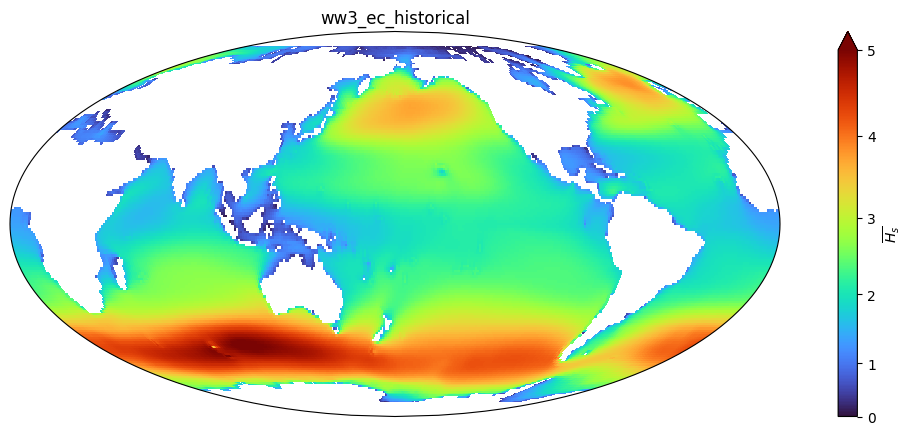

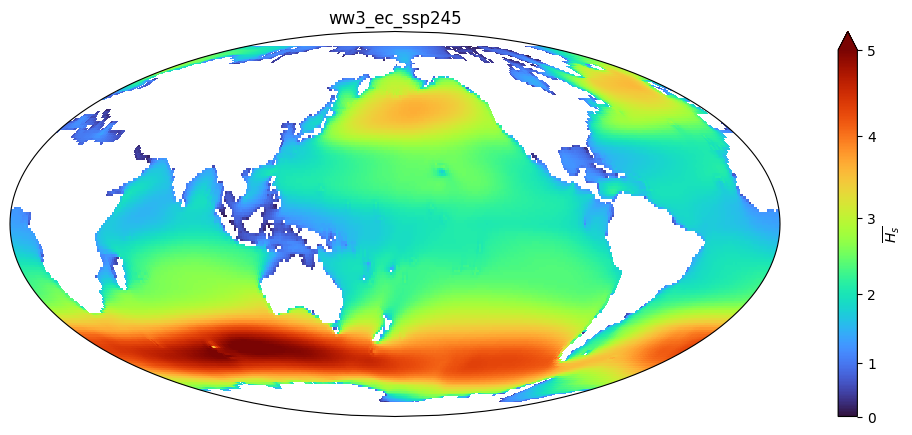

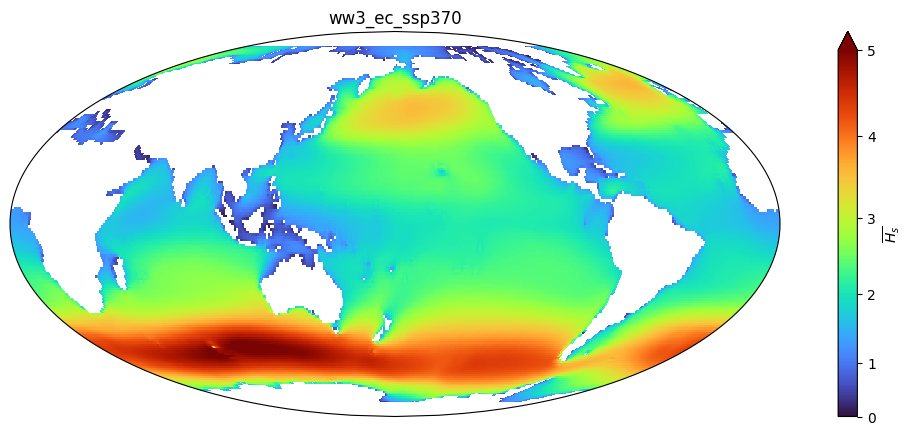

In [10]:
labels = ["ww3_ec_historical", "ww3_ec_ssp245", "ww3_ec_ssp370"]

for label in labels:
    ax = plot_hs(
        labels=[label],
        stat="mean",
        norm=PowerNorm(1.2, 0, 5),
        figsize=(15, 5),
        projection=ccrs.Mollweide(central_longitude=180),
        extents="global",
        cbar_kwargs={"label": "$\overline{H_s}$"},
    )

#### 3.1.2. WW3 Global Mean Hs differences

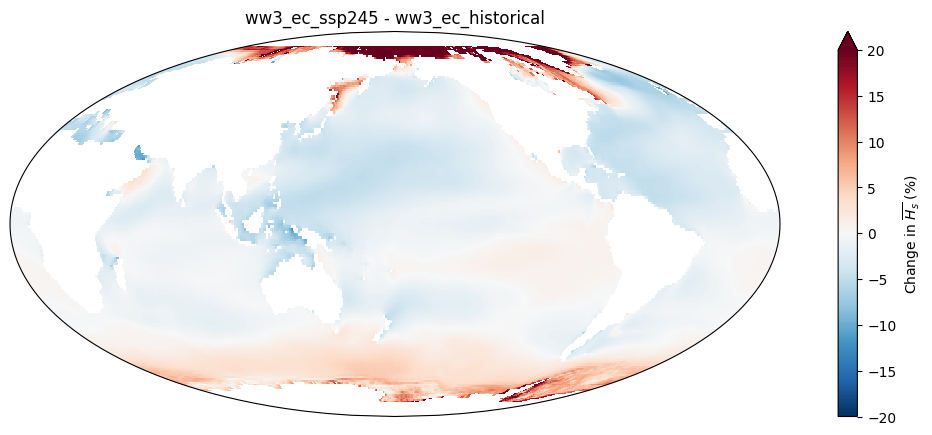

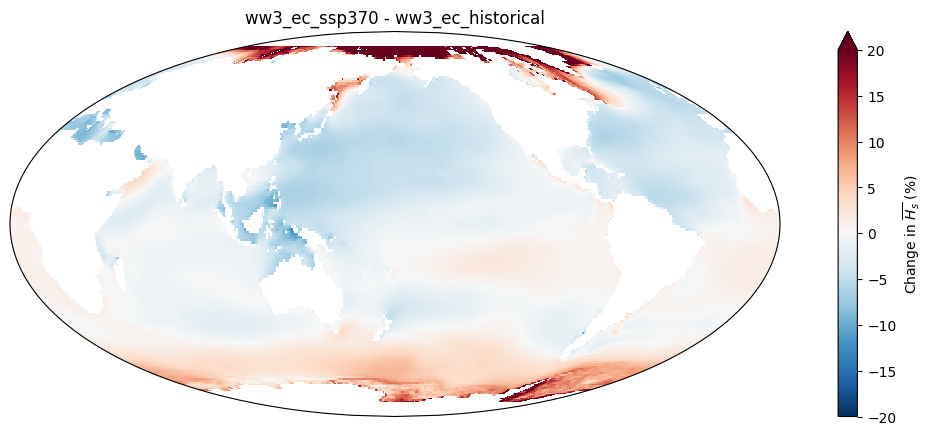

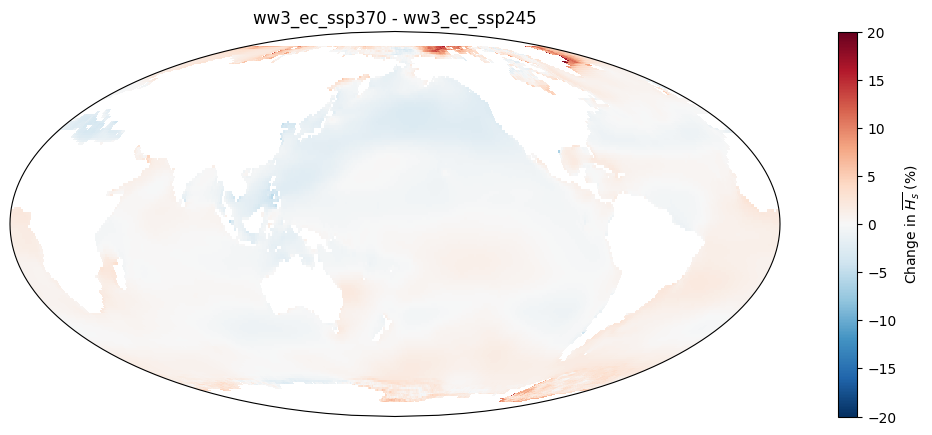

In [11]:
diff_labels = [
    ["ww3_ec_historical", "ww3_ec_ssp245"],
    ["ww3_ec_historical", "ww3_ec_ssp370"],
    ["ww3_ec_ssp245", "ww3_ec_ssp370"]
]

for label1, label2 in diff_labels:
    ax = plot_diff(
        label1=label1,
        label2=label2,
        stat="mean",
        vmax=20,
        figsize=(15, 5),
        projection=ccrs.Mollweide(central_longitude=180),
        extents="global",
        cbar_kwargs={"label": "Change in $\overline{H_s}$ (%)"},
    )

#### 3.1.3. SWAN New Zealand Mean Hs

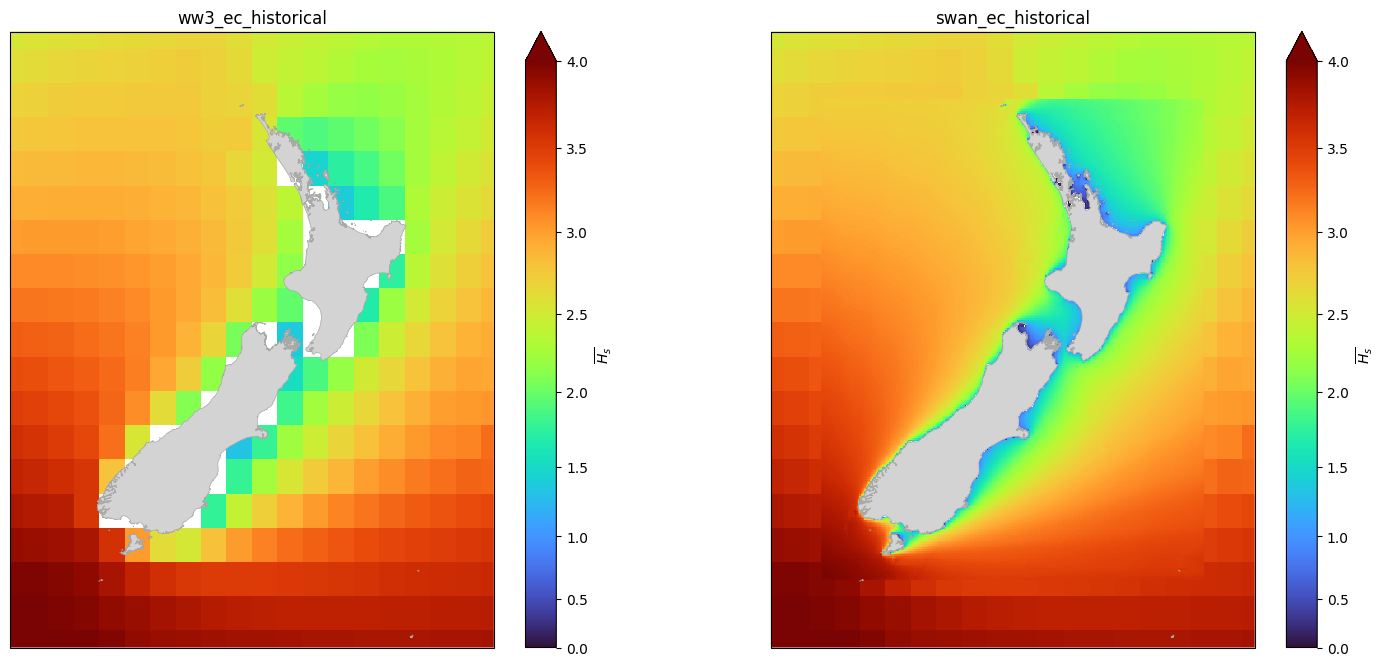

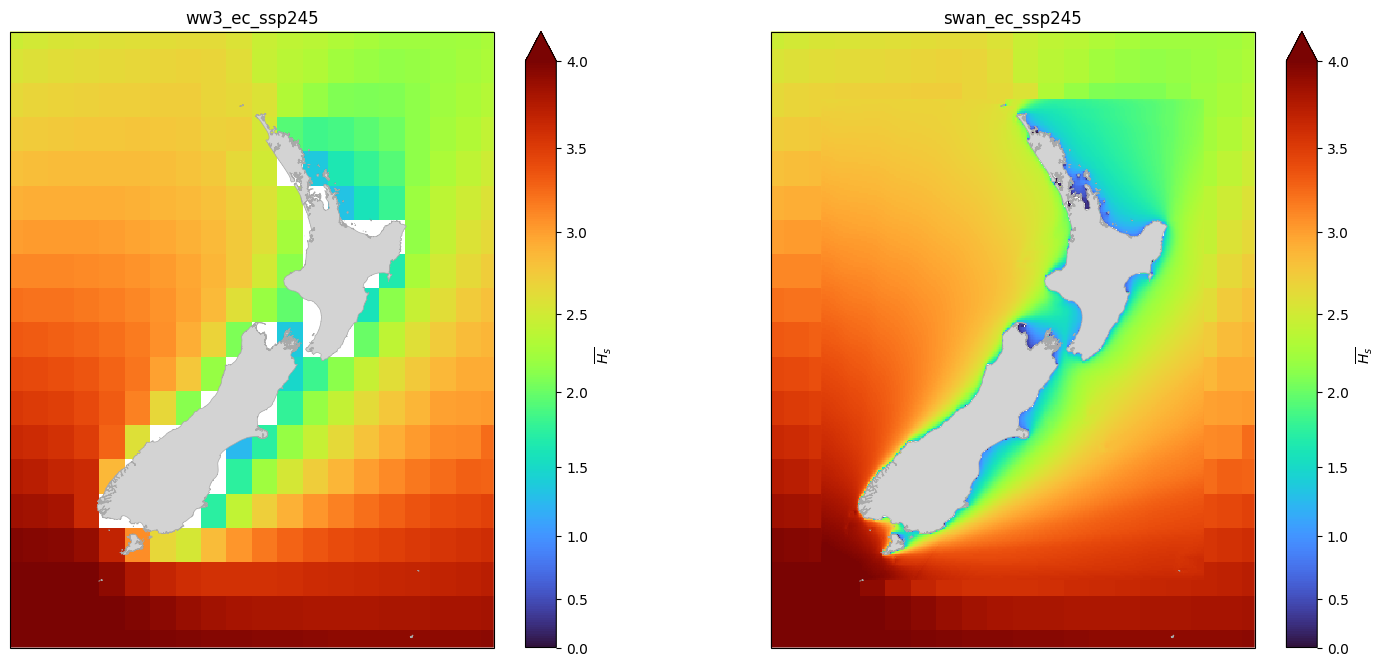

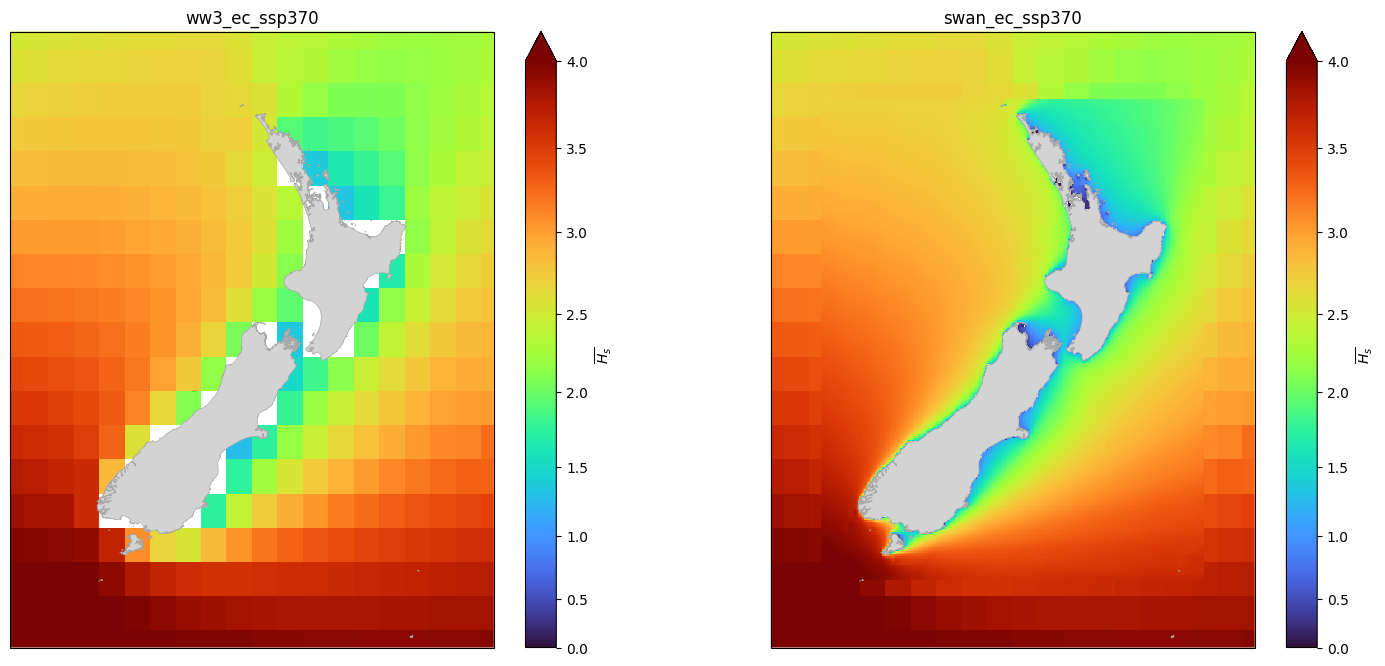

In [12]:
label_pairs = [
    ["ww3_ec_historical", "swan_ec_historical"],
    ["ww3_ec_ssp245", "swan_ec_ssp245"],
    ["ww3_ec_ssp370", "swan_ec_ssp370"],
]

projection = ccrs.PlateCarree(central_longitude=172.5)

kwargs = dict(
    stat="mean",
    norm=PowerNorm(1.2, 0, 4),
    extents=[163, 182, -50, -32],
    land=land,
    cbar_kwargs={"label": "$\overline{H_s}$"},
)

for labels in label_pairs:
    fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={"projection": projection})
    # WW3
    ax = plot_hs(ax=axs[0], labels=[labels[0]], **kwargs)
    # WW3 + SWAN
    ax = plot_hs(ax=axs[1], labels=labels, **kwargs)

#### 3.1.4. SWAN New Zealand Mean Hs differences

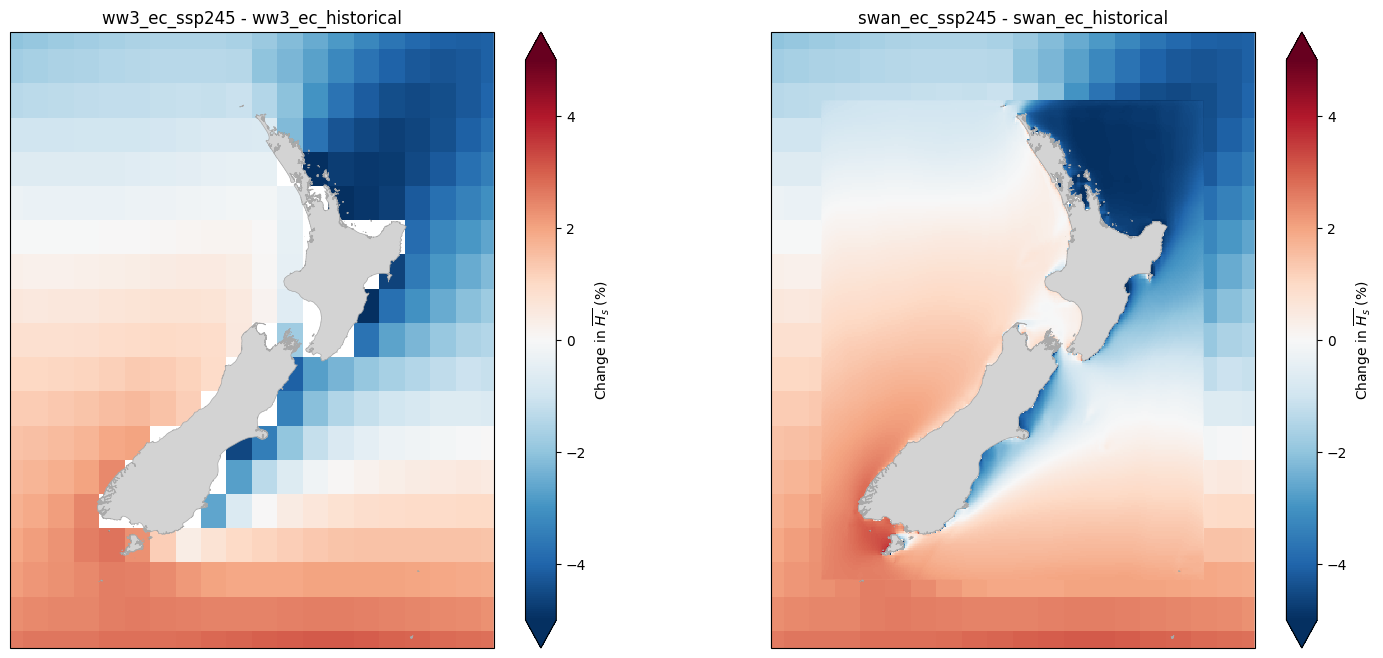

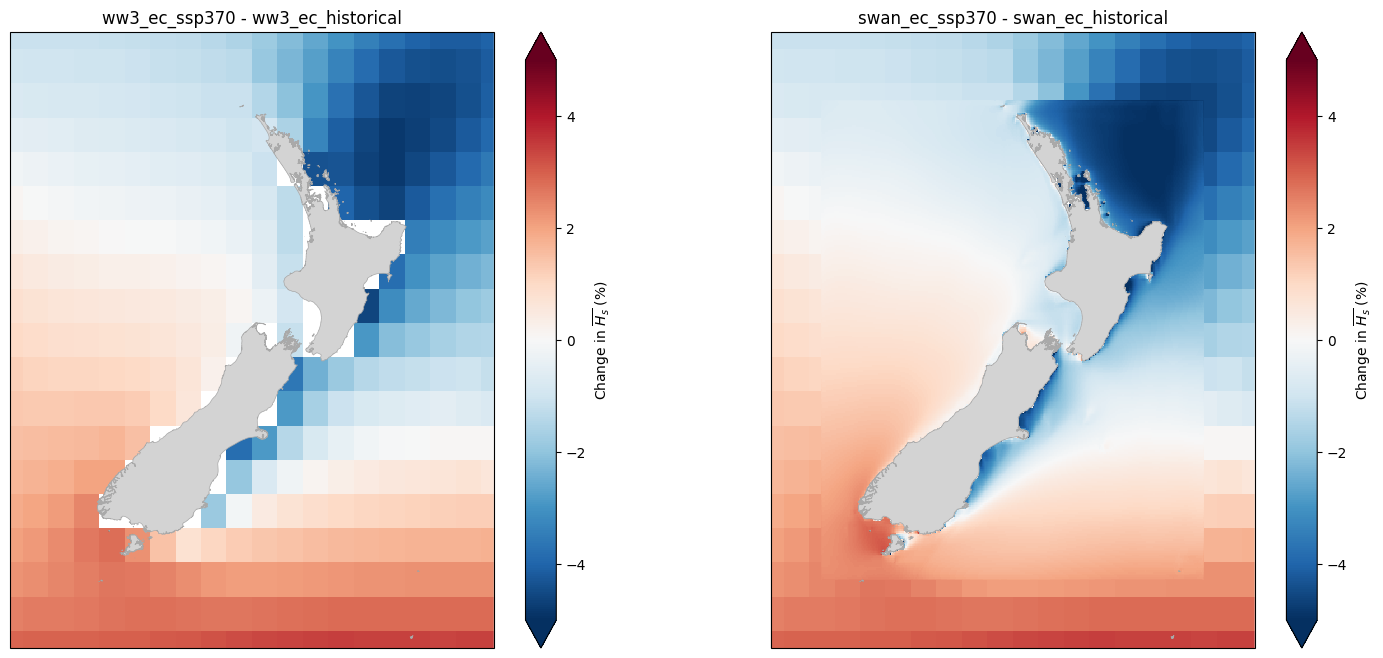

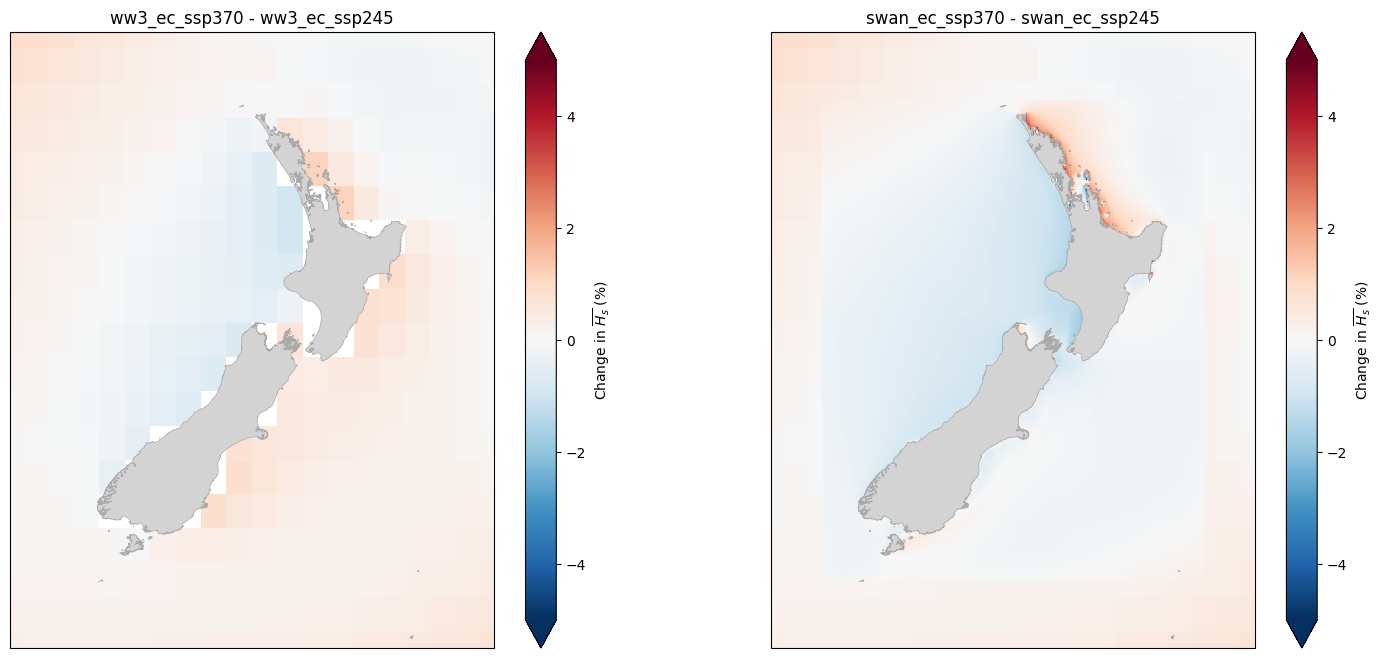

In [13]:
diff_labels = [
    ["swan_ec_historical", "swan_ec_ssp245"],
    ["swan_ec_historical", "swan_ec_ssp370"],
    ["swan_ec_ssp245", "swan_ec_ssp370"],
]

projection = ccrs.PlateCarree(central_longitude=172.5)

kwargs = dict(
    stat="mean",
    vmax=5,
    extents=[163, 182, -50, -32],
    land=land,
    cbar_kwargs={"label": "Change in $\overline{H_s}$ (%)"},
)

for lab1, lab2 in diff_labels:
    fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={"projection": projection})
    # WW3
    ax = plot_diff(ax=axs[0], label1=lab1.replace("swan", "ww3"), label2=lab2.replace("swan", "ww3"), **kwargs)
    # SWAN
    ax = plot_diff(ax=axs[1], label1=lab1.replace("swan", "ww3"), label2=lab2.replace("swan", "ww3"), **kwargs)
    ax = plot_diff(ax=ax, label1=lab1, label2=lab2, add_colorbar=False, **kwargs)

### 3.2. ACCESS-CM2

#### 3.2.1. WW3 Global Mean Hs

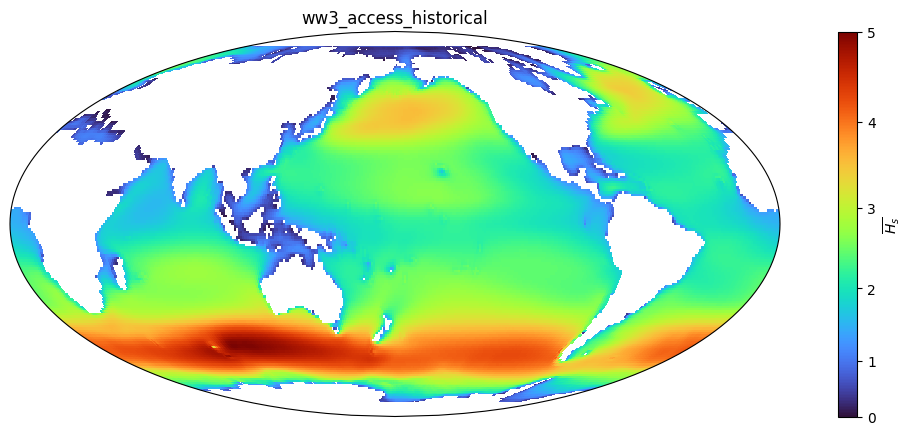

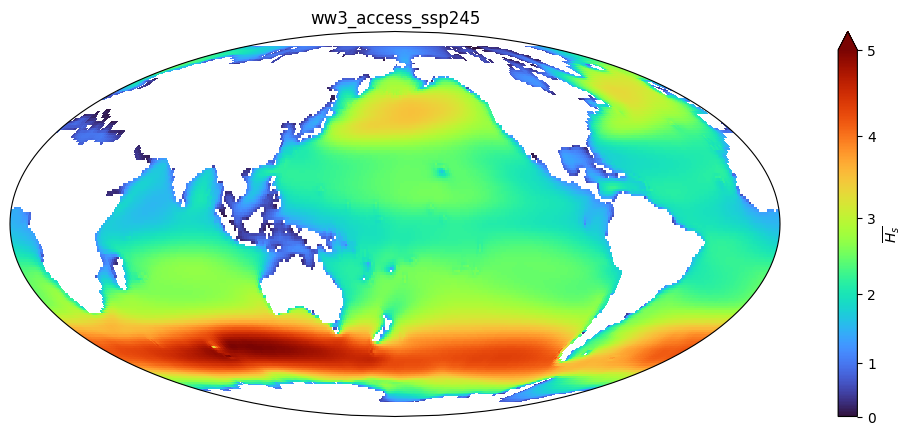

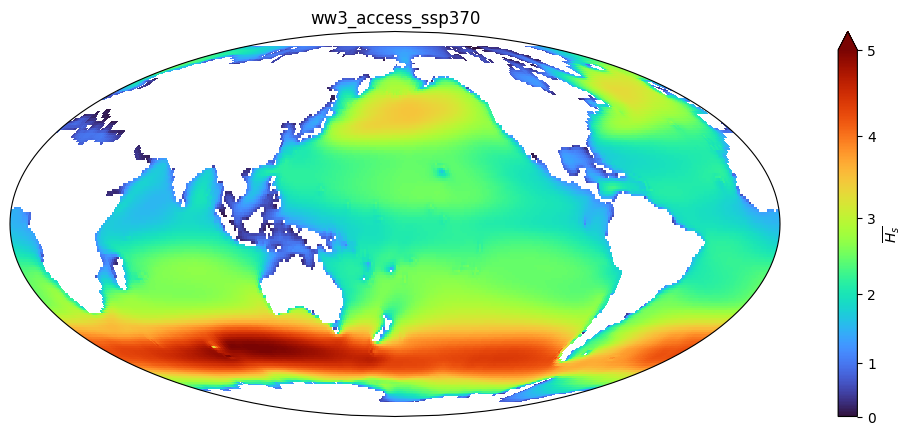

In [14]:
labels = ["ww3_access_historical", "ww3_access_ssp245", "ww3_access_ssp370"]

for label in labels:
    ax = plot_hs(
        labels=[label],
        stat="mean",
        norm=PowerNorm(1.2, 0, 5),
        figsize=(15, 5),
        projection=ccrs.Mollweide(central_longitude=180),
        extents="global",
        cbar_kwargs={"label": "$\overline{H_s}$"},
    )

#### 3.2.2. WW3 Global Mean Hs differences

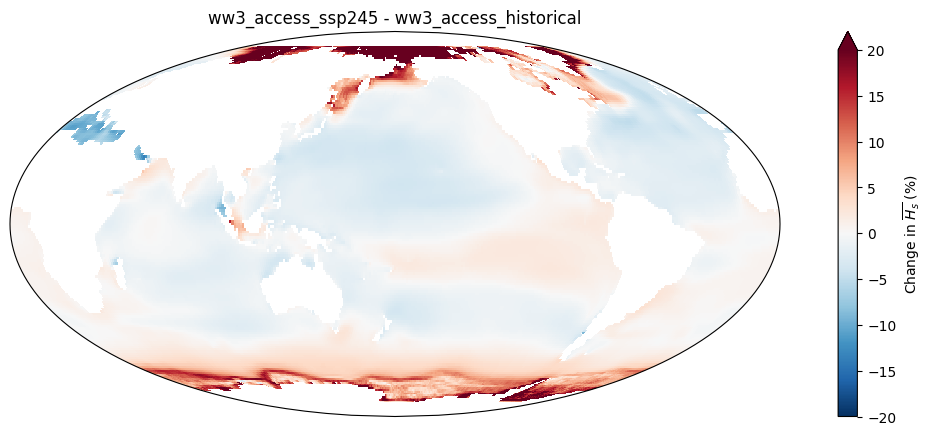

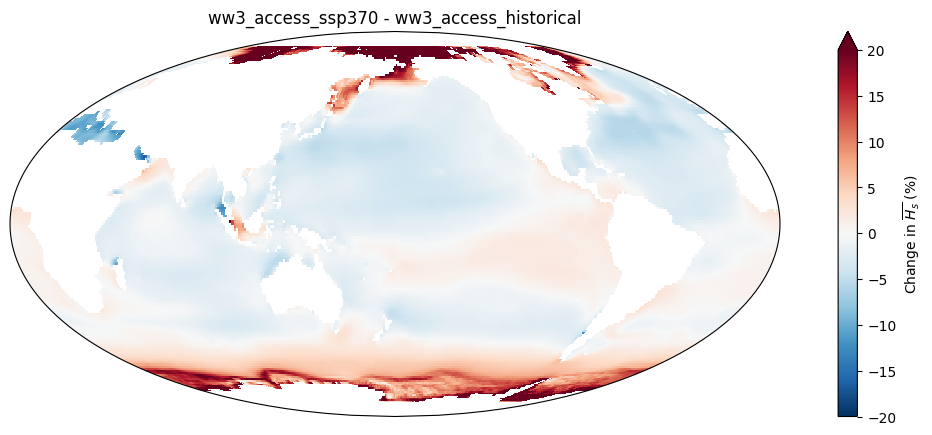

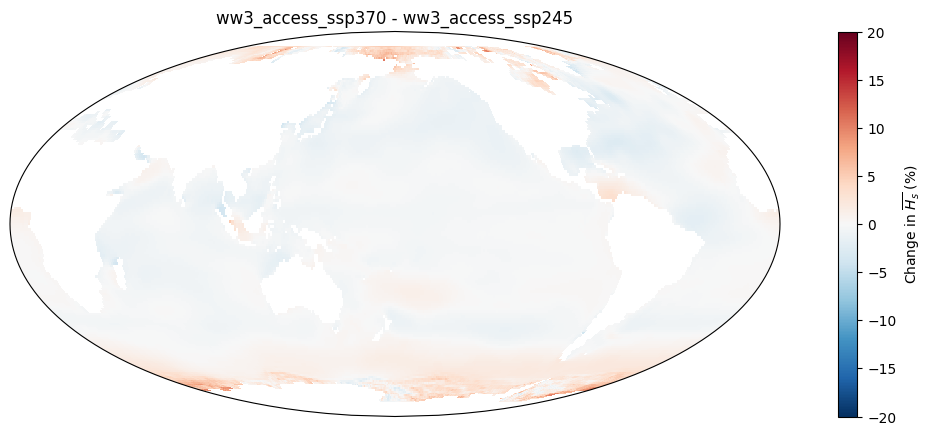

In [15]:
diff_labels = [
    ["ww3_access_historical", "ww3_access_ssp245"],
    ["ww3_access_historical", "ww3_access_ssp370"],
    ["ww3_access_ssp245", "ww3_access_ssp370"]
]

for label1, label2 in diff_labels:
    ax = plot_diff(
        label1=label1,
        label2=label2,
        stat="mean",
        vmax=20,
        figsize=(15, 5),
        projection=ccrs.Mollweide(central_longitude=180),
        extents="global",
        cbar_kwargs={"label": "Change in $\overline{H_s}$ (%)"},
    )

#### 3.2.3. SWAN New Zealand Mean Hs

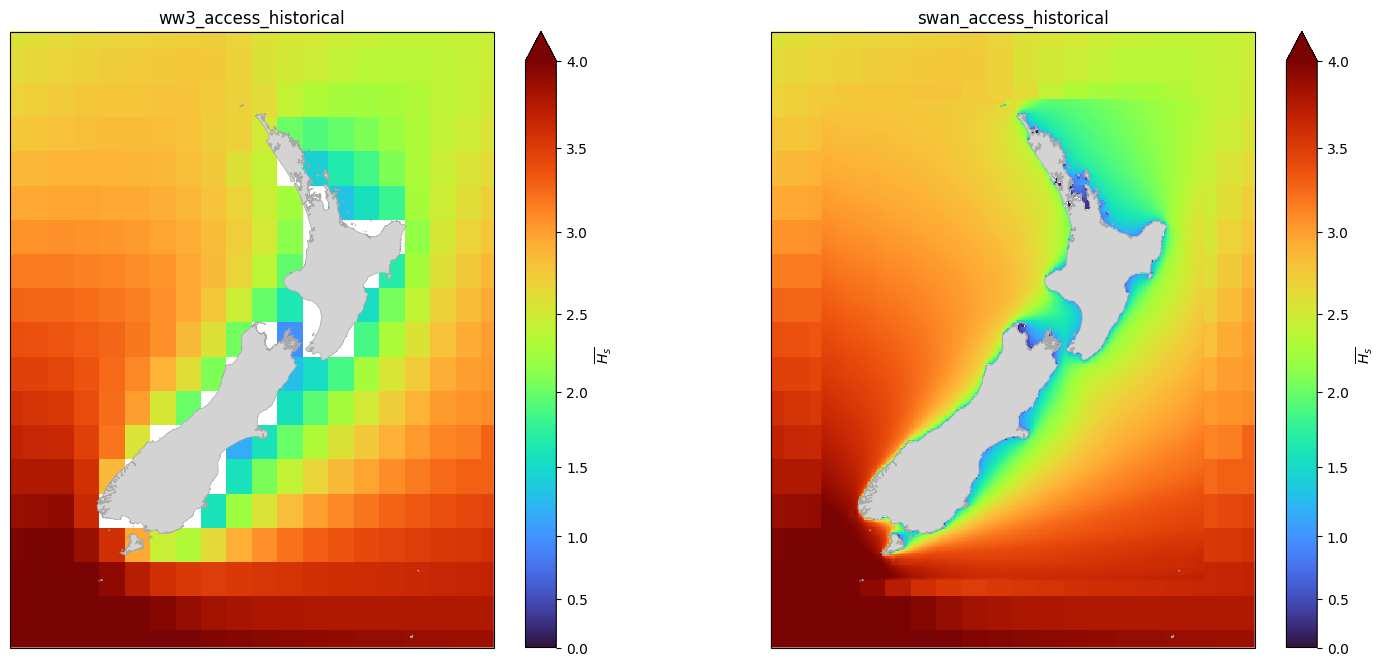

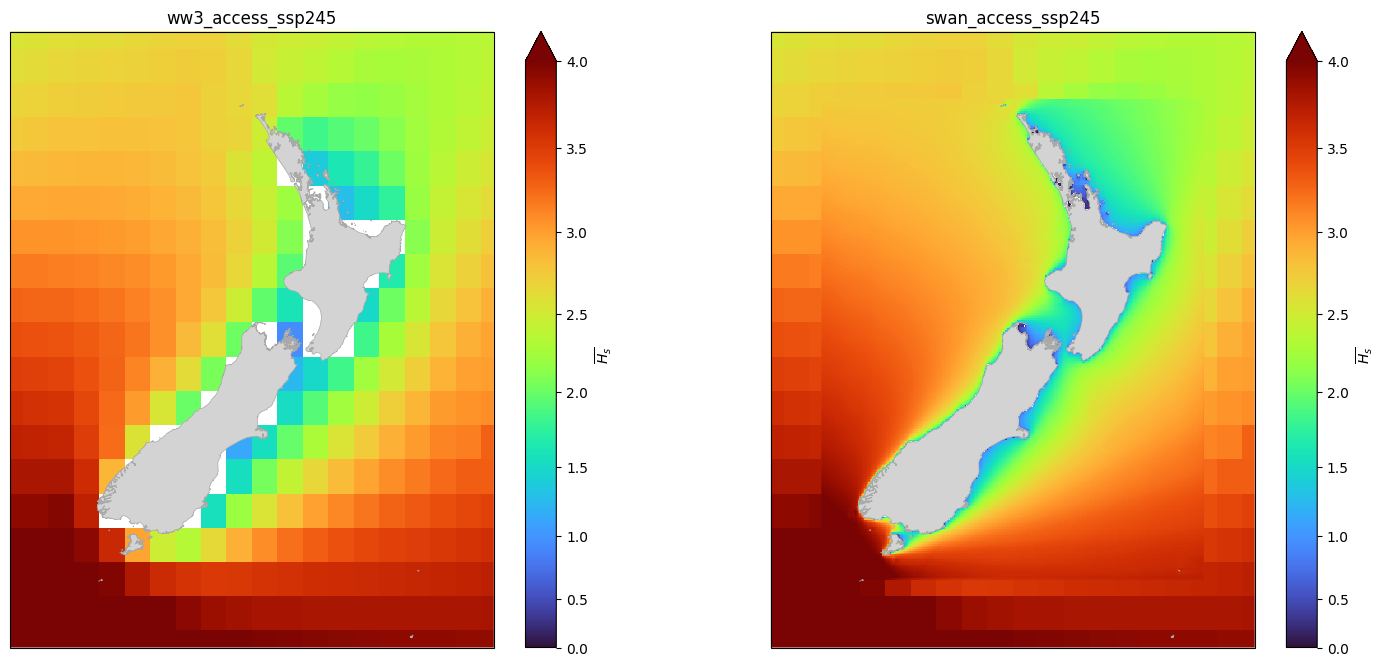

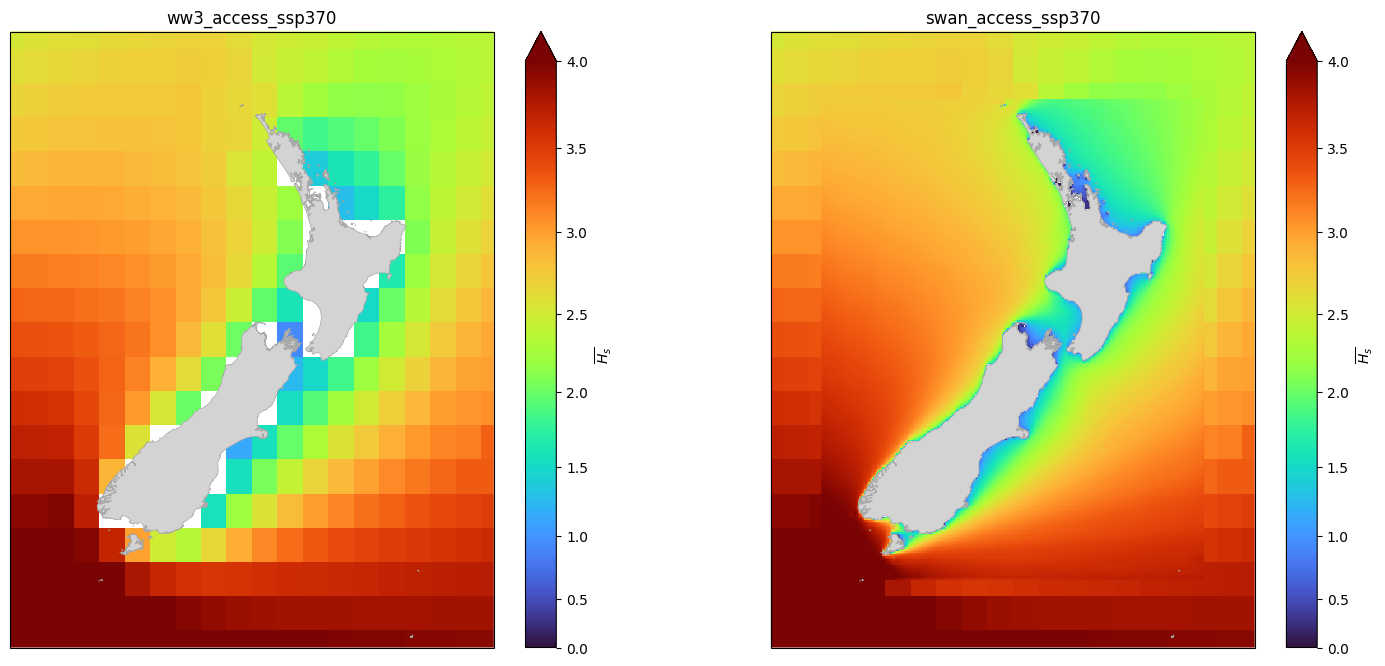

In [16]:
label_pairs = [
    ["ww3_access_historical", "swan_access_historical"],
    ["ww3_access_ssp245", "swan_access_ssp245"],
    ["ww3_access_ssp370", "swan_access_ssp370"],
]

projection = ccrs.PlateCarree(central_longitude=172.5)

kwargs = dict(
    stat="mean",
    norm=PowerNorm(1.2, 0, 4),
    extents=[163, 182, -50, -32],
    land=land,
    cbar_kwargs={"label": "$\overline{H_s}$"},
)

for labels in label_pairs:
    fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={"projection": projection})
    # WW3
    ax = plot_hs(ax=axs[0], labels=[labels[0]], **kwargs)
    # WW3 + SWAN
    ax = plot_hs(ax=axs[1], labels=labels, **kwargs)

#### 3.2.4. SWAN New Zealand Mean Hs differences

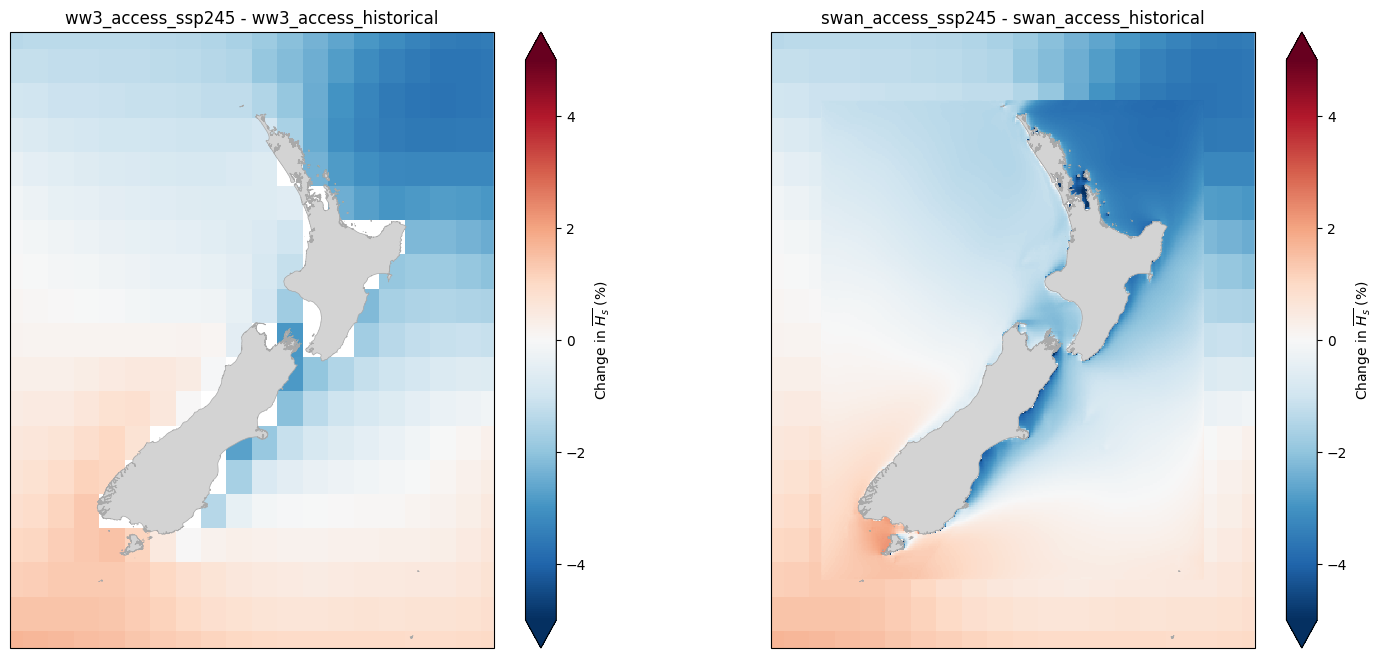

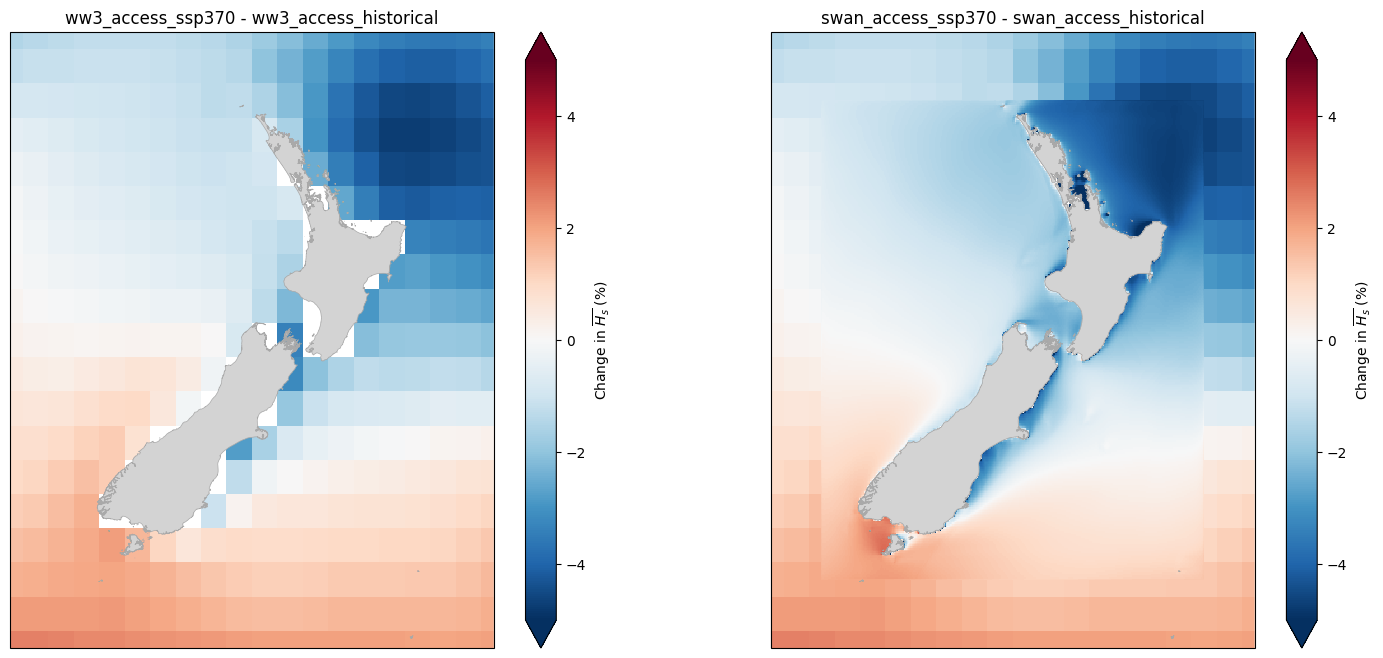

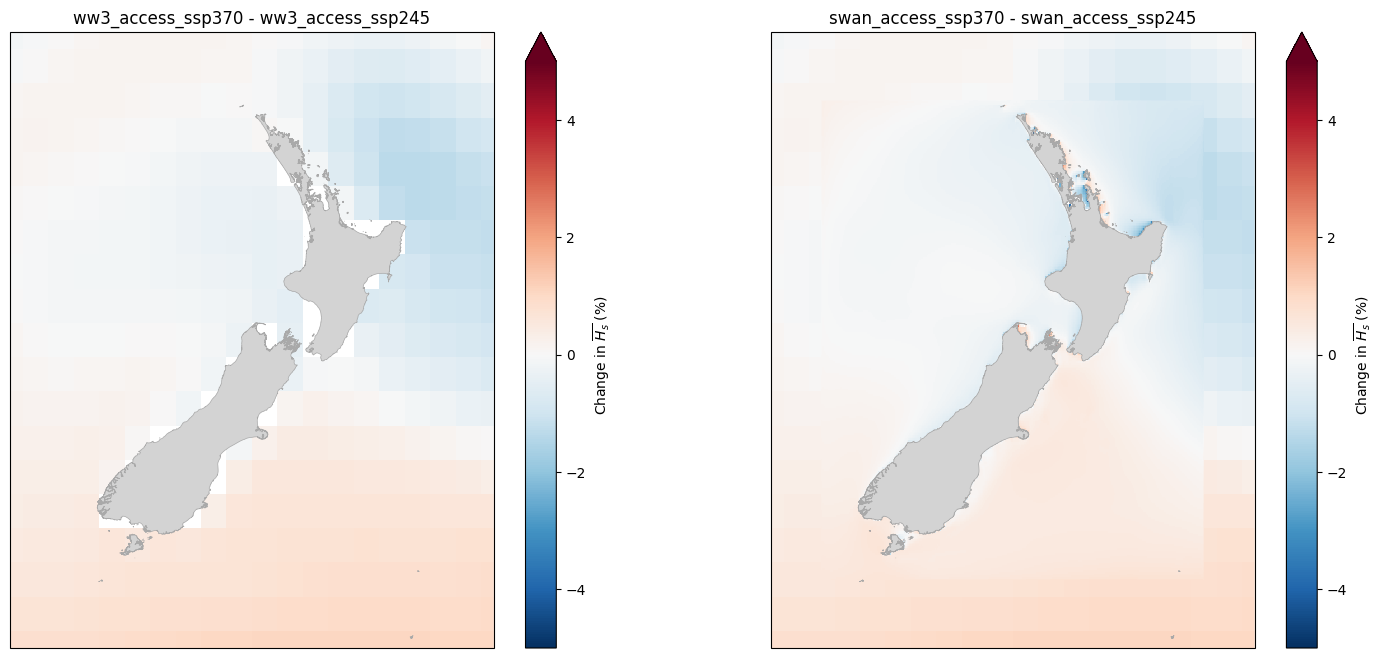

In [17]:
diff_labels = [
    ["swan_access_historical", "swan_access_ssp245"],
    ["swan_access_historical", "swan_access_ssp370"],
    ["swan_access_ssp245", "swan_access_ssp370"],
]

projection = ccrs.PlateCarree(central_longitude=172.5)

kwargs = dict(
    stat="mean",
    vmax=5,
    extents=[163, 182, -50, -32],
    land=land,
    cbar_kwargs={"label": "Change in $\overline{H_s}$ (%)"},
)

for lab1, lab2 in diff_labels:
    fig, axs = plt.subplots(1, 2, figsize=(18, 8), subplot_kw={"projection": projection})
    # WW3
    ax = plot_diff(ax=axs[0], label1=lab1.replace("swan", "ww3"), label2=lab2.replace("swan", "ww3"), **kwargs)
    # SWAN
    ax = plot_diff(ax=axs[1], label1=lab1.replace("swan", "ww3"), label2=lab2.replace("swan", "ww3"), **kwargs)
    ax = plot_diff(ax=ax, label1=lab1, label2=lab2, add_colorbar=False, **kwargs)